In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import PolygonSelector
from matplotlib.lines import Line2D
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon, title=None):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.add_title(title)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors, title=None):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.add_title(title)
    vis.show()


In [5]:
def draw_polygon_tri(polygon, tri, title=None):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    for line in tri_line_segments:
        vis.add_line_segment(line, color='red')
    vis.add_title(title)
    return vis


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

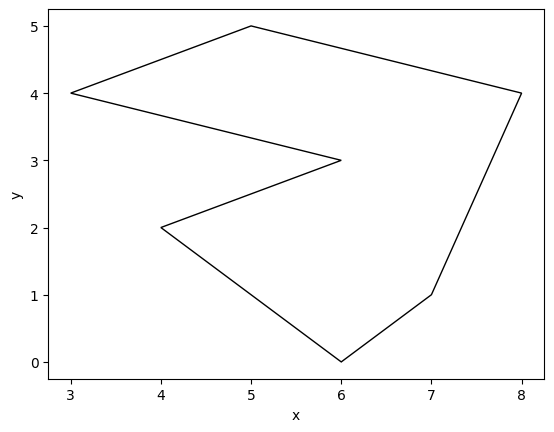

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
polygons = [
    [(0.020935482517365475, -0.041766749737309476), (0.028697579291559028, -0.01750204385495653), (0.015391127678655803, -0.006380720325544764), (0.029806450259300968, 0.013839867909749365), (0.016721772839946122, 0.0381045737921023), (-0.03073790457940872, 0.0404636424195533), (-0.02275403361166678, 0.017209965948965053), (-0.034064517482634525, -0.011772877188289857), (-0.020758065869731293, -0.016154004639270247), (-0.026745969095537746, -0.044125818364760455)],
    [(-0.035395162643924845, -0.040834352175394696), (-0.022532259418118393, -0.008481410998924091), (-0.017431452966505487, -0.034768175704806455), (-0.008116936837473235, -0.011177489430296644), (-0.0019072594181183955, -0.0364532247244143), (0.004967740581881611, -0.009829450214610375), (0.018052418001236442, -0.03679023452833587), (0.025149192194784842, -0.01656964629304175), (0.028254030904462255, 0.02656760860891906), (0.013173385743171936, 0.04914726547166415), (0.002528224452849351, 0.0292636870402916), (-0.013661291676182907, 0.04510314782460534), (-0.018762098127795813, 0.029937706648134735), (-0.038500001353602264, 0.042070059589311204), (-0.044709678772957104, 0.02286050076578179), (-0.04049596909553775, -0.013873567861669198)],
    [(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)],
    [(-0.01147404639951645, -0.026084557795057105), (-0.011917594786613223, -0.04360906759897868), (0.004715469729515809, -0.04563112642250809), (0.005380792310160976, -0.027095587206821814), (0.04485659876177388, -0.019344361716625735), (0.013364663277902908, -0.004515930344076699), (0.044413050374677104, 0.020422795146119388), (-0.000607110915645484, 0.04873161867553116), (-0.04340953027048419, 0.029522059852001736), (-0.014800659302742256, 0.01637867749906055), (-0.04651436898016162, -0.01058210681466494), (-0.014800659302742256, -0.010245097010743373)],
    [(-0.003046627044677744, 0.04670955985200173), (-0.034538562528548714, 0.02480392259709978), (-0.030768401238226127, -0.023725489167606126), (0.0020541794069351693, -0.04158700877544927), (0.03775982456822549, -0.02338847936368456), (0.034654985858548065, 0.02581495200886448)],
    [(0.027247732531639826, -0.0187377430410946), (-0.014889364242553715, -0.005931370492074997), (0.039445313176801125, 0.006200982449101486), (-0.0031353319844892036, 0.0146262275471407), (0.04099773253163984, 0.025747551076552466), (-0.0038006545651343565, 0.03821691382165052), (0.042106603499381764, 0.05068627656674857), (-0.00513129972642469, 0.05304534519419954), (-0.050151461016747265, -0.04536151755089854)],
    [(0.04277192608002693, 0.0008762265186683937), (-0.0033571061780375833, 0.031544118675531155), (-0.04238936424255372, 0.043339461812786056), (-0.01777242875868275, 0.015367648087295849), (-0.03551436424255372, 0.010312501028472323), (-0.018437751339327915, -0.005863969559762983), (-0.0341837190812634, -0.012604165638194359), (-0.016885331984489202, -0.025747547991135537), (-0.04150226746836017, -0.033498773481331616), (-0.015554686823198882, -0.04023896955976299), (-0.036401461016747266, -0.04799019504995907), (-0.013115170694166622, -0.0530453421087826)],
    [(0.03523160349938177, -0.0065379891676061175), (0.0037396680155108025, 0.01637867749906055), (0.041884829305833385, 0.02446691279317821), (0.004848538983252729, 0.03794730495004095), (0.03767111962841403, 0.04435049122455076), (0.005735635757446289, 0.05210171671474684), (-0.04837726746836017, -0.0466421558342728)],
    [(0.00041305511228499625, -0.0378125), (0.03900176478970435, -0.0037745098039215635), (0.0013001518864785427, 0.036666666666666695), (-0.03595791262965049, -0.001752450980392145)],
    [(-0.00779259004900533, -0.022040440147998275), (0.017046119628414028, -0.04799019504995907), (0.04654208737034951, -0.013278185246037494), (0.024142893821962413, -0.021703430344076707), (0.03922353898325273, 0.03794730495004095), (0.009949345434865642, 0.0514276971069037), (-0.005574848113521463, 0.029859069655923304), (-0.02797404166190856, 0.04805759906768803), (-0.051260331984489205, 0.02918505004808017), (-0.03285307391997307, -0.0014828421087825921), (-0.01200629972642469, 0.005257353969648784), (-0.02686517069416662, 0.014356618675531146), (-0.004465977145779523, 0.01671568730298212), (0.0030743454348656357, -0.0024938715205472944), (-0.023982106178037588, -0.022714459755841424), (-0.040171622307069846, -0.014289214657802196), (-0.04926436424255372, -0.03484681269701789), (-0.025312751339327914, -0.05102328328525319), (-0.00402242875868275, -0.04123736418929755)]
]

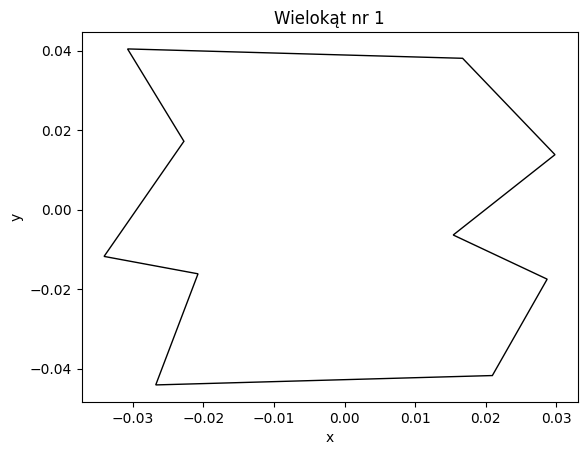

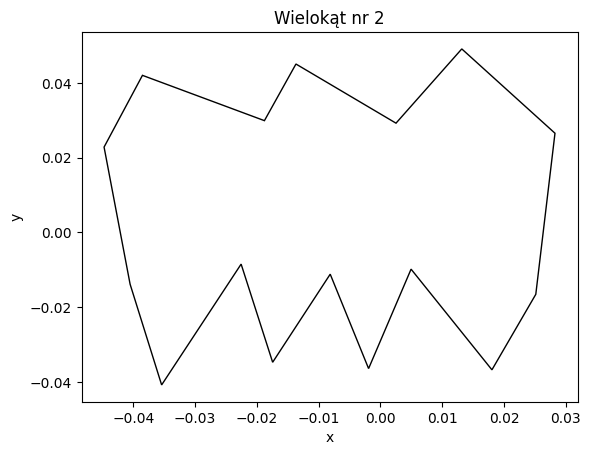

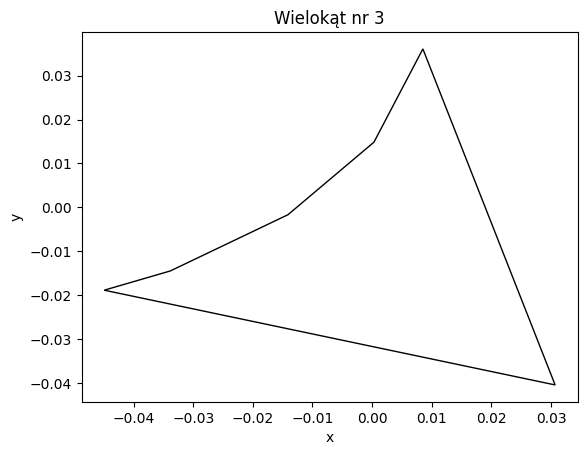

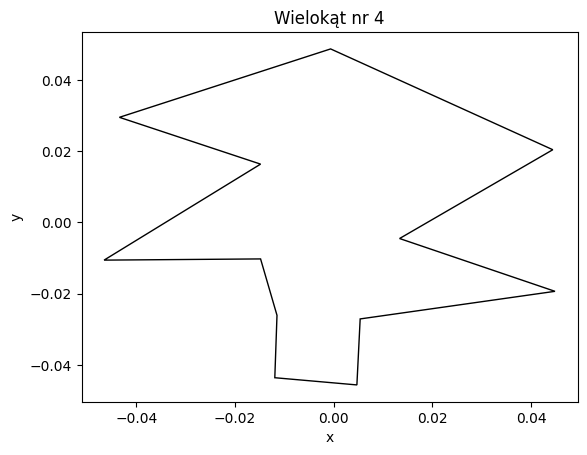

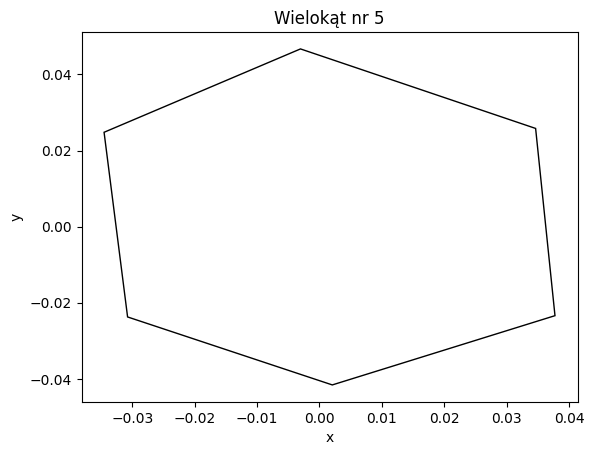

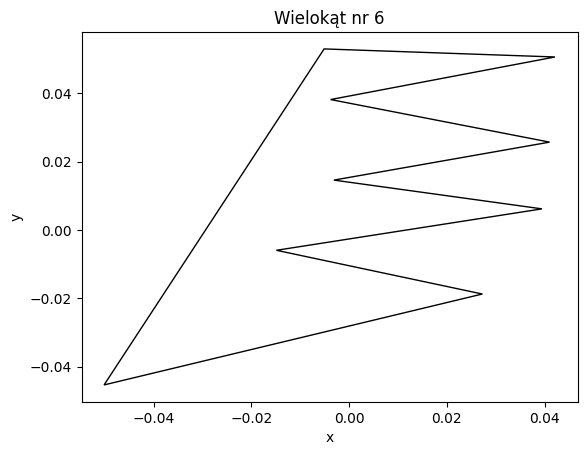

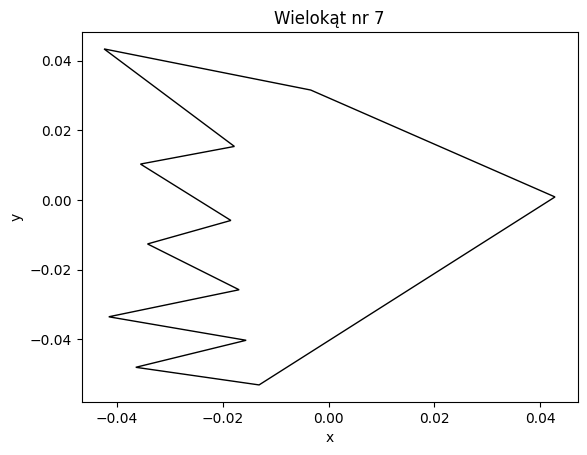

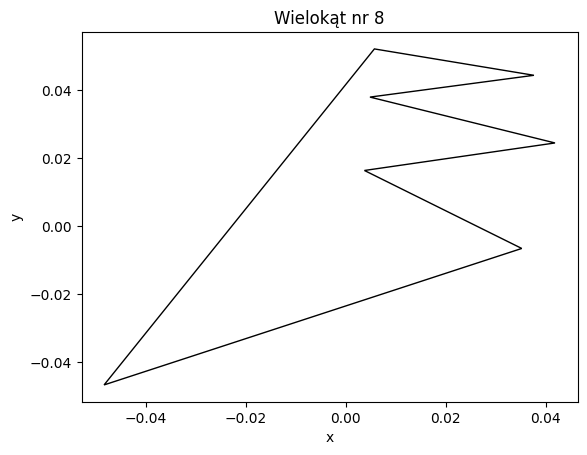

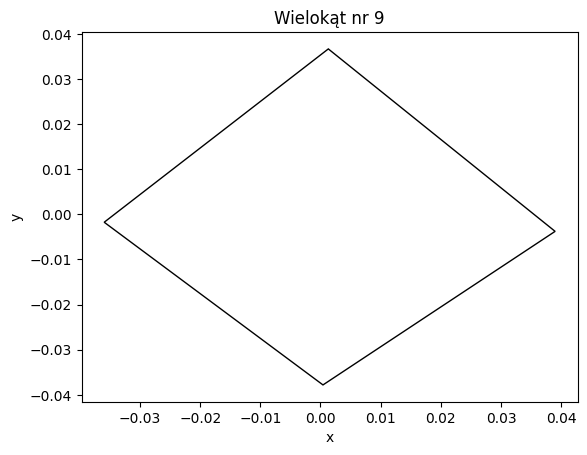

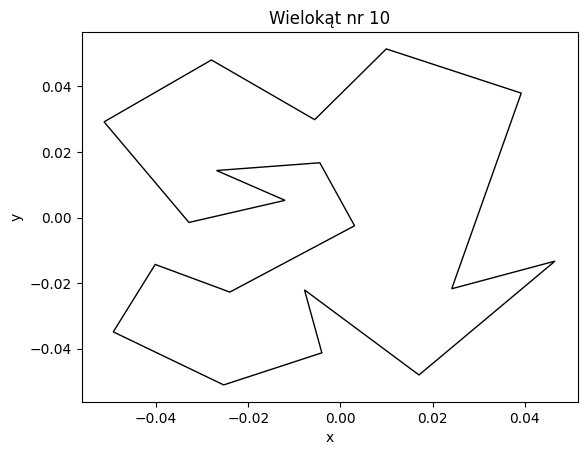

In [8]:
for i in range(len(polygons)):
    draw_polygon(polygons[i], f"Wielokąt nr {i+1}")

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

#### Funkcje pomocnicze

In [9]:
def det(a, b, c):
    return ((a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0]))

def orientation(a, b, c, eps=0):
    orient = det(a, b, c)
    if orient>eps: return 1
    if orient<-eps: return -1
    return 0
def conn_or_sep(a, b, c):
    orient = orientation(a, b, c)
    if a[1]>b[1] and c[1]>b[1] and orient==-1:
        return True
    elif a[1]<b[1] and c[1]<b[1] and orient==-1:
        return True
    return False
def classify(a, b, c):
    det_abc = det(a, b, c)
    #początkowy
    if a[1] < b[1] and c[1]<b[1] and det_abc>0: return 0
    #końcowy
    if a[1] > b[1] and c[1]>b[1] and det_abc>0: return 1
    #łączący
    if a[1] > b[1] and c[1]>b[1] and det_abc<0: return 2
    #dzielący
    if a[1] < b[1] and c[1]<b[1] and det_abc<0: return 3
    #prawidłowy
    return 4
    

In [10]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """ 
    n = len(polygon)
    for i in range(n):
        if conn_or_sep(polygon[i%n], polygon[(i+1)%n], polygon[(i+2)%n]):
            return False
    return True

Przeprowadź test poprawności powyższej funkcji.

In [11]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdźmy monotoniczność naszych wielokątów.

In [12]:
for i in range(len(polygons)):
    print(f"Czy wielokąt nr {i+1} jest monotoniczny: {is_y_monotonic(polygons[i])}")

Czy wielokąt nr 1 jest monotoniczny: True
Czy wielokąt nr 2 jest monotoniczny: False
Czy wielokąt nr 3 jest monotoniczny: True
Czy wielokąt nr 4 jest monotoniczny: False
Czy wielokąt nr 5 jest monotoniczny: True
Czy wielokąt nr 6 jest monotoniczny: True
Czy wielokąt nr 7 jest monotoniczny: True
Czy wielokąt nr 8 jest monotoniczny: True
Czy wielokąt nr 9 jest monotoniczny: True
Czy wielokąt nr 10 jest monotoniczny: False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

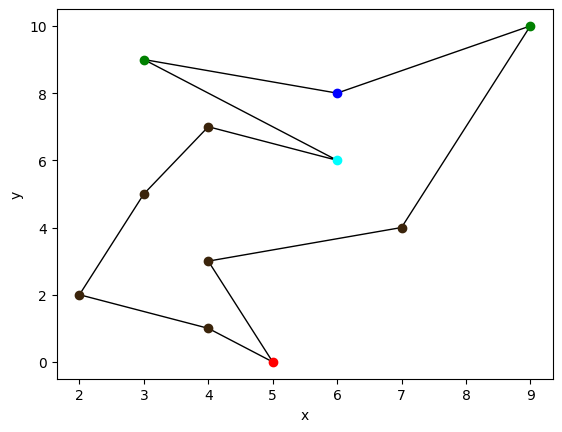

In [13]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [14]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 
        0 - początkowy, 
        1 - końcowy, 
        2 - łączący, 
        3 - dzielący, 
        4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    return [classify(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n]) for i in range(n)]

Przeprowadź test poprawności powyższej funkcji. 

In [15]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizujmy nasze wielokąty z pokolorowanymi według kategorii wierzchołkami.

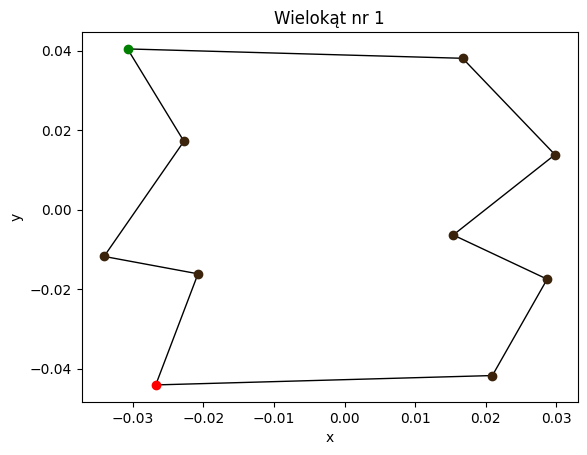

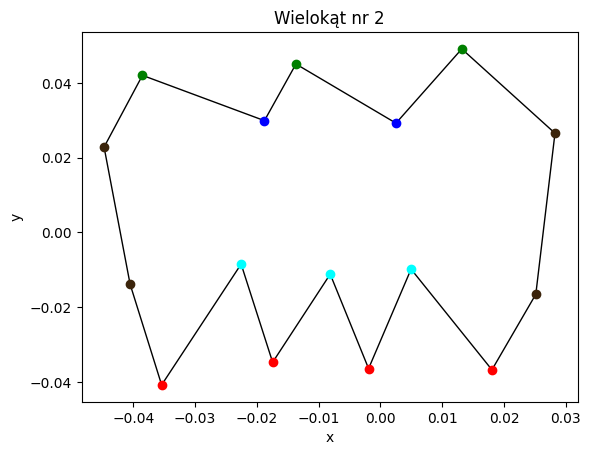

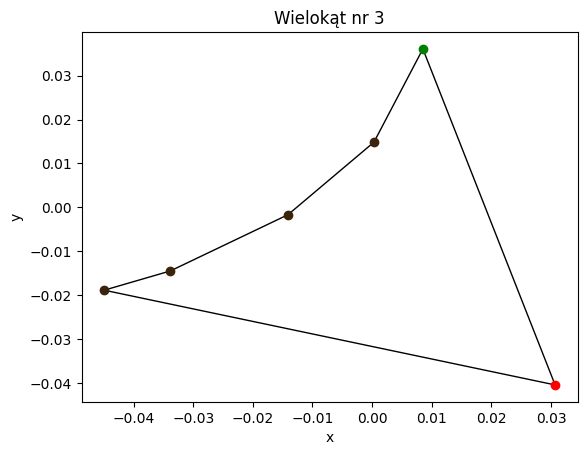

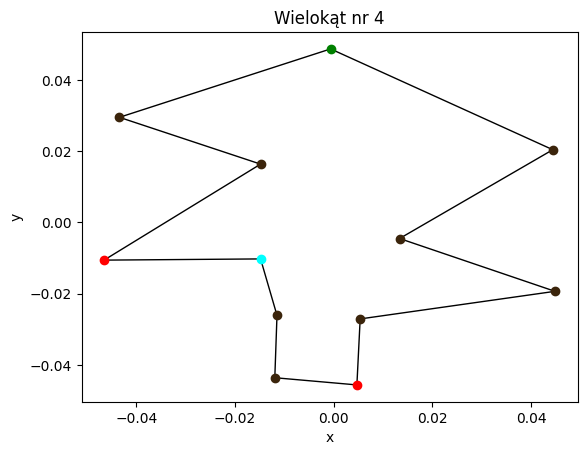

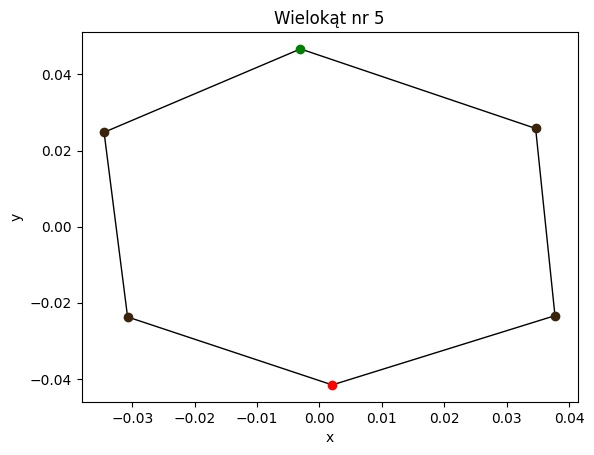

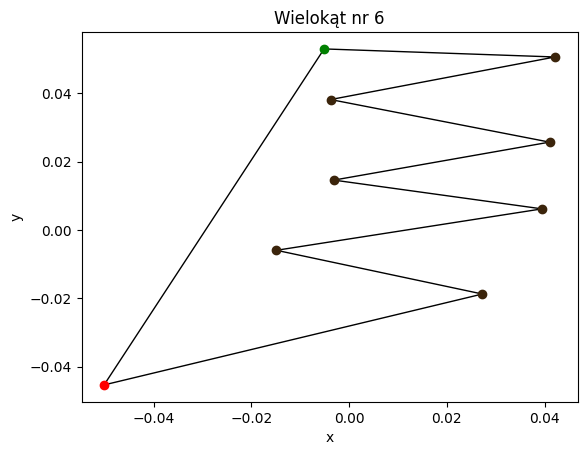

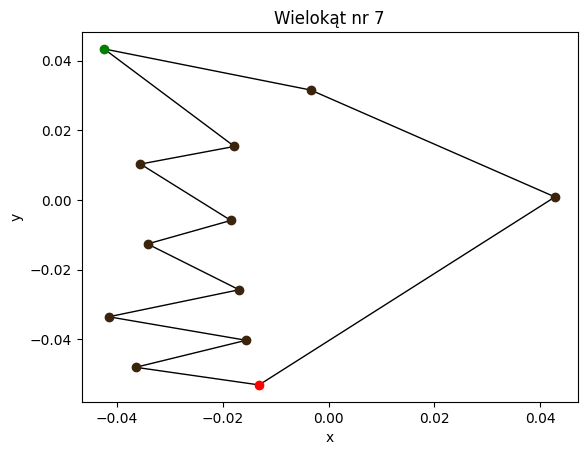

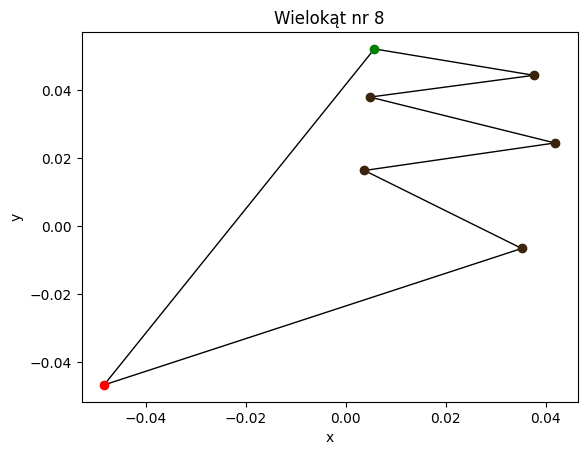

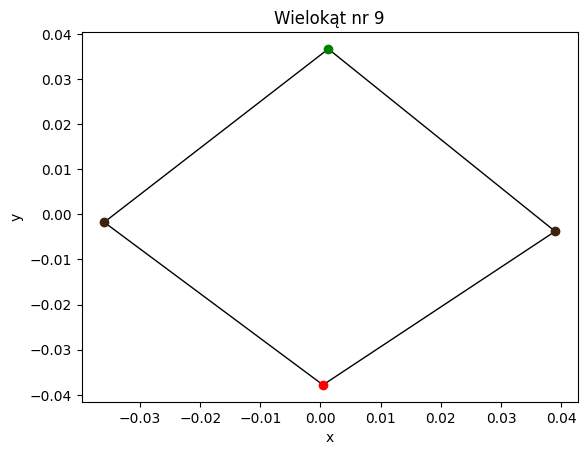

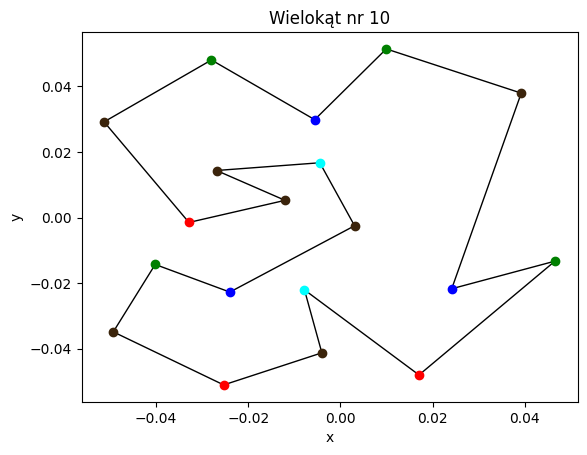

In [16]:
for i in range(len(polygons)):
    colors = color_vertex(polygons[i])
    draw_polygon_colors(polygons[i],colors, f"Wielokąt nr {i+1}")

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

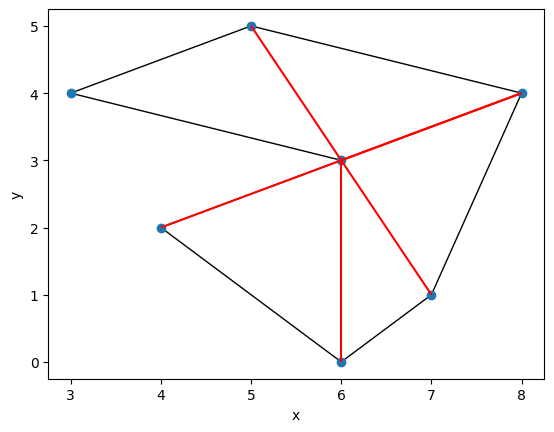

In [17]:
draw_polygon_tri(polygon_example_1,polygon_example_tri).show()

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [18]:
def findChains(points):
    right = set()
    left = set()
    start = points.index(max(points, key=lambda x: x[1]))
    end = points.index(min(points, key=lambda x: x[1]))
    i = end
    while i != start:
        right.add(points[i])
        i = (i + 1) % len(points)
    while i != end:
        left.add(points[i])
        i = (i + 1) % len(points)
    return left, right


def inTheSameChain(left, right, point1, point2):
    return (point1 in left and point2 in left) or (point1 in right and point2 in right)

def triangleInsidePolygon(chain, a, b, c):
    if b in chain:
        return det(a, b, c) > 0
    return det(a, b, c) < 0

def adjacent(points, a, b):
    a_index = points.index(a)
    b_index = points.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(points) - 1:
        return True
    return False

In [19]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    if not is_y_monotonic(polygon):
        return False
    points = polygon[:]

    left, right = findChains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    diagonals = []
    for i in range(2, len(points)):
        if not inTheSameChain(left, right, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not adjacent(polygon, p, points[i]):
                    diagonals.append((points[i], p))
                
            stack.append(points[i - 1])
            stack.append(points[i])
            
        else:
            p = stack.pop()
            while len(stack) > 0 and triangleInsidePolygon(left, stack[-1], p, points[i]):
                if not adjacent(polygon, p, points[i]) and \
                        (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                if not adjacent(polygon, stack[-1], points[i]) and \
                        (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                p = stack.pop()
                
            stack.append(p)
            stack.append(points[i])
    
    wynik = []
    for x in diagonals:
        wynik.append([polygon.index(x[0]), polygon.index(x[1])]) 
    return wynik

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [20]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizujmy nasze wielokąty (te które są monotoniczne) podzielone na trójkąty.

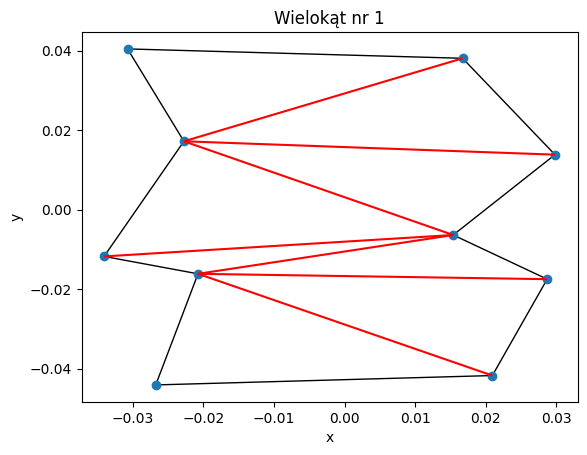

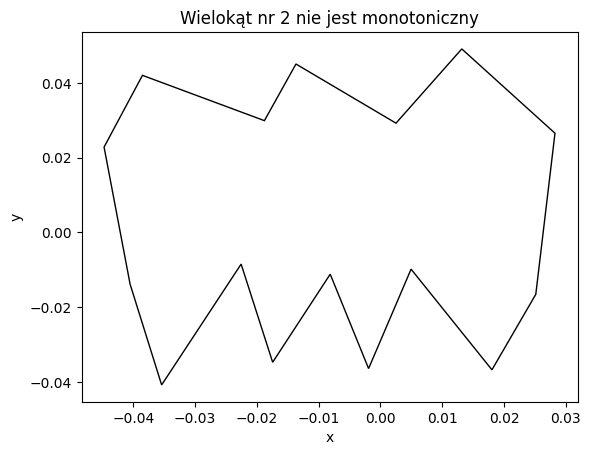

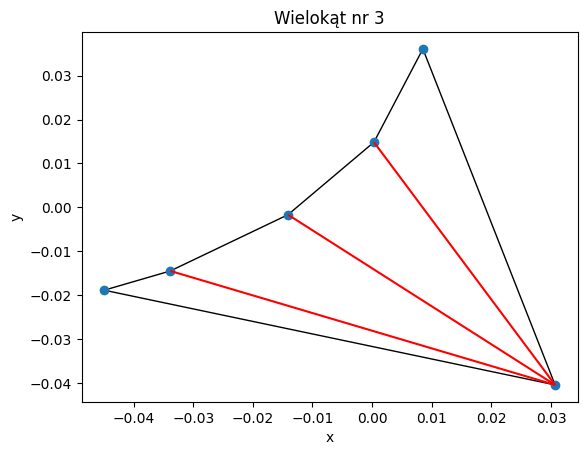

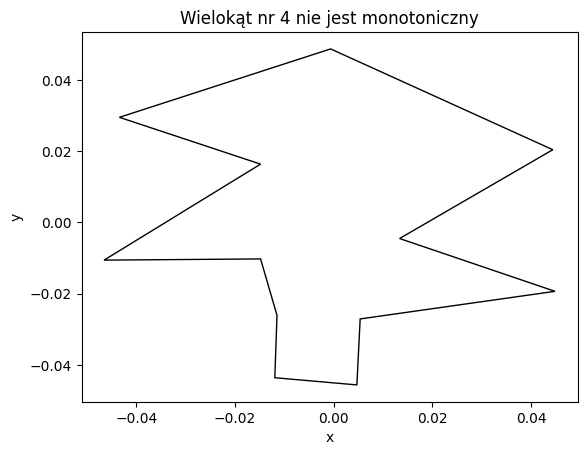

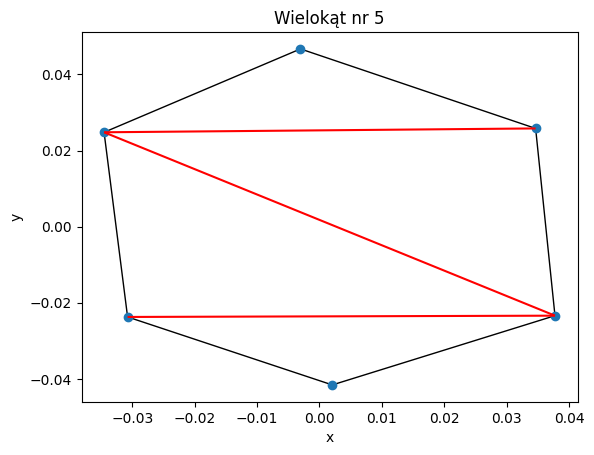

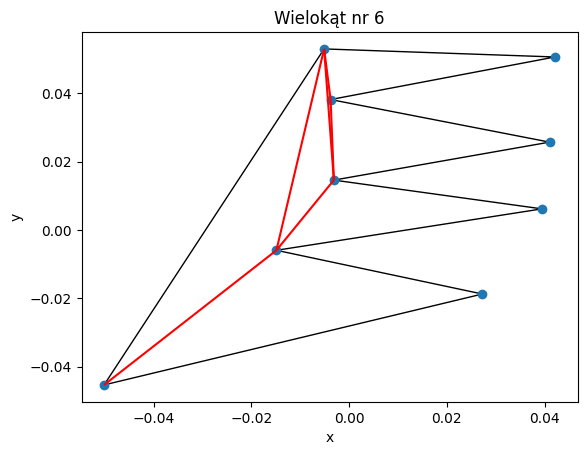

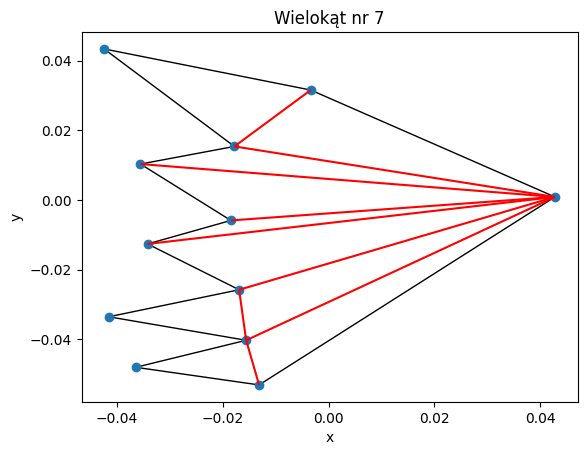

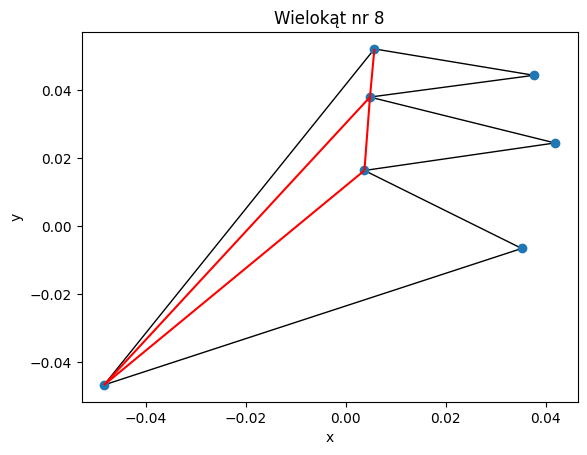

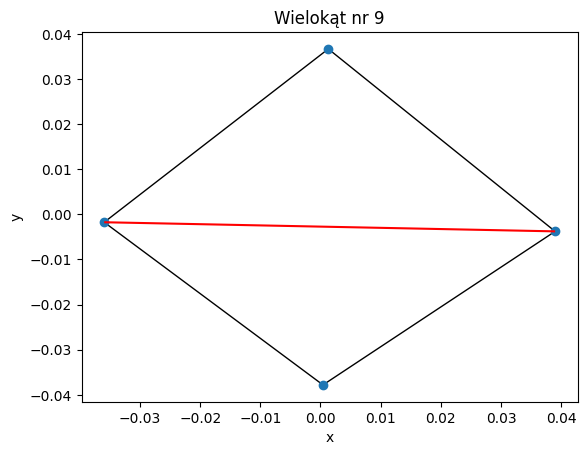

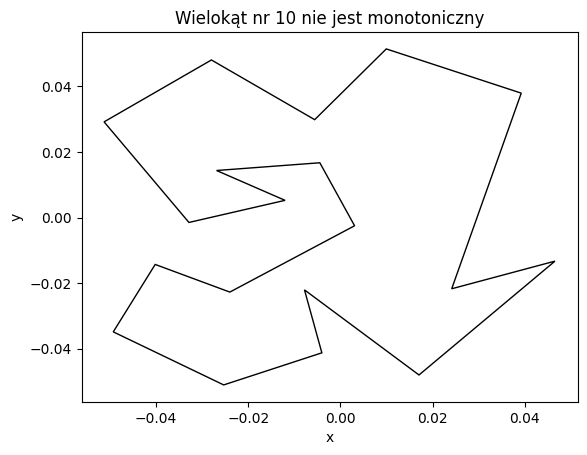

In [21]:
def map(polygon, tri):
    res = []
    for i in range(len(tri)):
        res.append((polygon[tri[i][0]], polygon[tri[i][1]]))
    return res

for i in range(len(polygons)):
    tri = triangulation(polygons[i])
    if tri:
        tri = map(polygons[i], tri)
        draw_polygon_tri(polygons[i], tri, f"Wielokąt nr {i+1}").show()
    else: 
        draw_polygon(polygons[i], f"Wielokąt nr {i+1} nie jest monotoniczny")

In [22]:
def onSelect(polygon, ax2, fig2):
    colors = color_vertex(polygon)
    tri = triangulation(polygon)
    colors_map = {
        '0' : 'green',
        '1' : 'red',
        '2' : 'blue',
        '3' : 'cyan',
        '4' : '#3B240B'
    }
    ax2.clear()
    for i in range(len(polygon)):
        s = colors_map[str(colors[i])]
        ax2.scatter(polygon[i][0],polygon[i][1], c=s, alpha=1)
        line = Line2D((polygon[i-1][0], polygon[i][0]), (polygon[i-1][1], polygon[i][1]), color='black')
        ax2.add_line(line)
    if tri!=False:
        for i in range(len(tri)):
            print(polygon[tri[i][0]])
            line = Line2D((polygon[tri[i][0]][0], polygon[tri[i][1]][0]), (polygon[tri[i][0]][1], polygon[tri[i][1]][1]), color='red')
            ax2.add_line(line)
        ax2.set_title("Podany wielokąt po procesie triangulacji")
    else:
        ax2.set_title("Wielokąt nie jest y-monotoniczny")
    fig2.show()
def create_polygon():
    #Click on the figure to create a polygon.
    #Press the 'esc' key to start a new polygon.
    #Try holding the 'shift' key to move all of the vertices.
    #Try holding the 'ctrl' key to move a single vertex.
    %matplotlib tk
    fig2, ax2 = plt.subplots()
    ax2.set_title("Wprowadź wielokąt do procesu triangulacji")
    fig2.show()
    polygonSelector = PolygonSelector(ax2, lambda *args: print(onSelect(args[0], ax2, fig2)))
        
    return polygonSelector

### Zadawanie wielokąta przy pomocy myszki
W tym celu proszę odkomentować oraz uruchomić komórkę poniżej

In [23]:
#create_polygon()

### Wizualizacja krokowa triangulacji
Kolor zielony - wierzchołek znajdujący się na stosie
Kolor czerwony - akutalnie rozpatrywany wierzchołek w pętli
Kolor biały - wierzchołek aktualnie zdjęcty ze stosu i ropzatrywany

In [24]:
def triangulation_vis(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    
    vis = Visualizer()
    vis.clear()
    vis.add_point(polygon, color='black')
    for i in range(len(polygon)):
        vis.add_line_segment((polygon[i-1], polygon[i]), color="black")
    if not is_y_monotonic(polygon):
        return False
    points = polygon[:]

    left, right = findChains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    vis.add_point(points[0], color='green')
    vis.add_point(points[1], color='green')
    
    diagonals = []
    for i in range(2, len(points)):
        vis.add_point(points[i], color='red')
        if not inTheSameChain(left, right, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                vis.add_point(p, color='white')
                if not adjacent(polygon, p, points[i]):
                    diagonals.append((points[i], p))
                    vis.add_line_segment((points[i], p), color="red")
                vis.add_point(p, color='black')
                
            stack.append(points[i - 1])
            vis.add_point(points[i-1], color='green')
            stack.append(points[i])
            vis.add_point(points[i], color='green')
            
        else:
            p = stack.pop()
            vis.add_point(p, color='white')
            while len(stack) > 0 and triangleInsidePolygon(left, stack[-1], p, points[i]):
                if not adjacent(polygon, p, points[i]) and \
                        (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                    vis.add_line_segment((points[i], p), color="red")
                if not adjacent(polygon, stack[-1], points[i]) and \
                        (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                    vis.add_line_segment((points[i], stack[-1]), color="red")
                vis.add_point(p, color='black')
                p = stack.pop()
                vis.add_point(p, color='white')
                
                
            stack.append(p)
            vis.add_point(p, color='green')
            stack.append(points[i])
            vis.add_point(points[i], color='green')
    return vis

#### Jako dane wejściowe należy podać listę wierzchołków wielokąta w postaci: [$(x_1,y_1), (x_2, y_2), ... , (x_n, y_n)$]

In [25]:
vis = triangulation_vis(polygons[6])

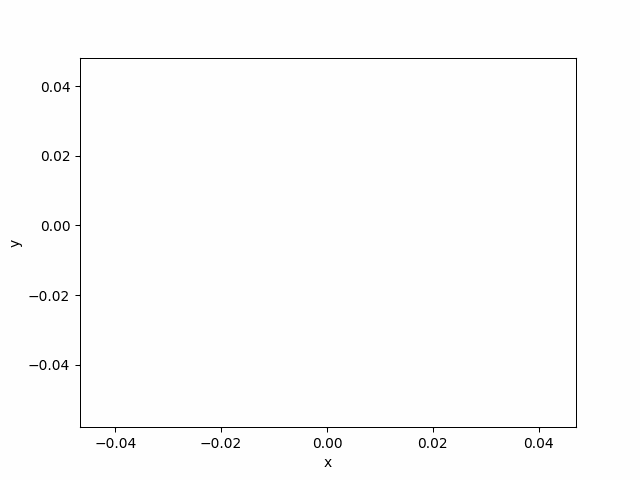

In [26]:
vis.show_gif(interval=500)